In [ ]:
2020-11-15 00:42:16  

Netflix, Inc. is an American technology and media services provider and production company headquartered in Los Gatos, California. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television series, including those produced in-house.(*Wikepedia*)

This noteboook is the first of two notebooks where I will perform exploratory data analysis on Netflix Movies and TV Shows data. The data used in this notebook was downloded from Kaggle and can be found [here](https://www.kaggle.com/shivamb/netflix-shows).

# Importing Libraries

Let's import all the necessary packages first.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

import plotly as py
import plotly.express as px
import plotly.graph_objs as go
import ipywidgets as widgets
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
py.offline.init_notebook_mode(connected=True)
from plotly import tools
from plotly.graph_objs import *
from IPython.display import display
init_notebook_mode(connected=True)
print('Packages Imported Successfully!')

Packages Imported Successfully!


# Import the Data
Here we import the data we will be working with. The datasets we will be importing are as follows:
    
   - 'netflix_titles.csv' as df

In this notebook we will only be looking at movie data so we will only use a subset of the data where the 'type' is 'Movie'.

In [192]:
df = pd.read_csv('netflix_titles.csv')
movies = df[df['type']=='Movie'] # select only the movies

print('Data Successfully imported!')

Data Successfully imported!


# Confirmatory Data Analysis

Let's take a look at our data to ensure that everything is as should be.
  
  - Data Info
    - The first and last five rows of the data
    - The shape of the dataframe, this includes the number of columns and rows
    - The names of the columns in the dataframe and their respective data types
  
  - Null values : number of cells with NaN values
   

## Data Info

In [7]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [9]:
movies.shape

(4265, 12)

In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4265 entries, 0 to 6231
Data columns (total 12 columns):
show_id         4265 non-null int64
type            4265 non-null object
title           4265 non-null object
director        4137 non-null object
cast            3905 non-null object
country         4070 non-null object
date_added      4264 non-null object
release_year    4265 non-null int64
rating          4257 non-null object
duration        4265 non-null object
listed_in       4265 non-null object
description     4265 non-null object
dtypes: int64(2), object(10)
memory usage: 433.2+ KB


## Missing Values
Now, let's see if we have any missing values in our dataset. 

Text(0, 0.5, 'Null Values')

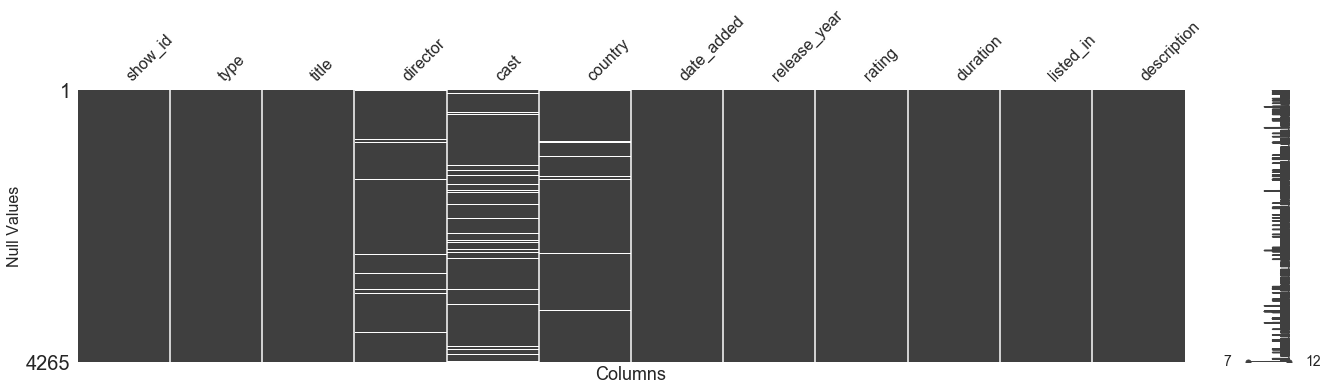

In [12]:
import missingno
missingno.matrix(movies, figsize=(22,5))
plt.xlabel('Columns', fontsize=18)
plt.ylabel('Null Values', fontsize=16)

As we can see from the visual above, the ***director***, ***cast***, and ***country*** columns have some missing values that are clearly dissernable. But this does not give any information on how many rows in these columns have missing values. We'll use the function defined below to show the number of missing values in each of the identified columns and what percentage of the data is missing.

In [13]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [14]:
missing_values_table(movies)

Your selected dataframe has 12 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
cast,360,8.4
country,195,4.6
director,128,3.0
rating,8,0.2
date_added,1,0.0


The number of missing values in these columns is not so high that it could affect our analysis of the data. And since each movie is unique, we won't impute any of the missing values as it will affect the quality of the data. We will also not be dropping any of the NaN values.

# Exploratory Data Analysis
In this section we look at how our features interact to and relate with each other. The features we will be using in our analysis are:
  - Title
  - Cast
  - Duration
  - Director
  - Genres (listed_in)
  - Release Year
  - Rating

## Which Movies Have The Shortest and Longest Durations?


Let us look at all the unique movie durations in the data frame as the 'duration' column is listed as a text column.

In [8]:
# show the number of unique movie durations
print(set(movies['duration']))

{'148 min', '40 min', '168 min', '109 min', '68 min', '209 min', '53 min', '60 min', '18 min', '25 min', '152 min', '51 min', '178 min', '177 min', '107 min', '137 min', '43 min', '67 min', '87 min', '171 min', '72 min', '196 min', '150 min', '15 min', '76 min', '29 min', '24 min', '131 min', '3 min', '41 min', '117 min', '180 min', '88 min', '174 min', '105 min', '123 min', '20 min', '55 min', '214 min', '46 min', '139 min', '85 min', '104 min', '94 min', '165 min', '11 min', '185 min', '164 min', '153 min', '32 min', '167 min', '54 min', '108 min', '312 min', '112 min', '114 min', '201 min', '190 min', '125 min', '50 min', '158 min', '127 min', '70 min', '63 min', '26 min', '77 min', '35 min', '86 min', '38 min', '124 min', '121 min', '126 min', '118 min', '189 min', '140 min', '100 min', '42 min', '66 min', '120 min', '64 min', '23 min', '173 min', '28 min', '162 min', '14 min', '90 min', '170 min', '34 min', '106 min', '10 min', '193 min', '92 min', '99 min', '133 min', '49 min', '

All values are reported as strings and the duration is measured in minutes. Let’s remove ‘min’ from the string values and convert the result to integers:

In [108]:
# strip the 'min' from the movie duration
movies['duration'] = movies['duration'].map(lambda x: x.rstrip('min')).astype(int)
print(set(movies['duration']))

{3, 10, 11, 12, 14, 15, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 179, 180, 181, 182, 185, 187, 189, 190, 191, 192, 193, 195, 196, 200, 201, 203, 205, 209, 214, 224, 228, 312}


Now that we have our movie durations in the right format we can generate some summary statistics to look at the longest, shortest and average duration of the movies in our data. 

In [10]:
# calculate the average star rating for movies 2 hours or longer,
# and compare that with the average star rating for movies shorter than 2 hours
print('The shortest movie in the dataset is ', round(movies['duration'].min(),2), ' minutes long' 
 '\nThe longest movie in the dataset is ', round(movies['duration'].max(),2), ' minutes long'
 '\nThe average runtime for movies in the dataset is ', round(movies['duration'].mean(),2), ' is minutes')

The shortest movie in the dataset is  3  minutes long
The longest movie in the dataset is  312  minutes long
The average runtime for movies in the dataset is  99.1  is minutes


The average runtime of movies in this dataset is 99.1 minutes, which approximates to 1 hour 39.1 minutes, which is the standard duration of a movie.

From my research I found that 'Cleopatra (1963)', is the longest Hollywood movie ever released with a runtime of 248 minutes, or ~4 hours and 8 minutes. Our data shows the longest movie having a duration of 312 minutes, or 5 hours and 12 minutes which is ~1 hour longer than the longest recorded movie duration. This means that the entry is incorrect and the correct runtime for 'Black Mirror: Bandersnatch' is shown in the image below. 

<img src="Screenshot (28).png">

So let's fix this error before we move on to the next step.

In [109]:
# change the duration from 312 to 90
movies.loc[movies['show_id'] == 80988062, 'duration'] = 90

In [12]:
movies[movies['show_id'] == 80988062]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4315,80988062,Movie,Black Mirror: Bandersnatch,NaN,"Fionn Whitehead, Will Poulter, Craig Parkinson...",United States,"December 28, 2018",2018,TV-MA,90,"Dramas, International Movies, Sci-Fi & Fantasy","In 1984, a young programmer begins to question..."


Now that we've fixed this error we have to re-check the summary statistics but this time we'll only calculate the mean and maximum durations.

In [13]:
print('The longest movie in the dataset is ', round(movies['duration'].max(),2), ' minutes long'
 '\nThe average runtime for movies in the dataset is ', round(movies['duration'].mean(),2), ' is minutes')

The longest movie in the dataset is  228  minutes long
The average runtime for movies in the dataset is  99.05  is minutes


In [14]:
# looking at the details for the movie with the longest runtime/duration
# details are correct as per IMDb
movies[movies['duration'] == 228] 

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4227,60002818,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,TV-14,228,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...


Now that we've confirmed that the information is correct we can move on to finding the ten titles with the longest runtime. The first step is to use a function to return the shortest and longest movies.

In [110]:
#use the function 'idmin' to find the index of shortest movie.
#use the function 'idmax' to find the index of longest movie.
#print the row related to this index.
def find_minmax(x):
    #use the function 'idmin' to find the index of shortest movie.
    min_index = movies[x].idxmin()
    #use the function 'idmax' to find the index of longest movie.
    high_index = movies[x].idxmax()
    high = pd.DataFrame(movies.loc[high_index,:])
    low = pd.DataFrame(movies.loc[min_index,:])
    
    #print the movie with high and low duration
    print("Movie Which Has Longest "+ x + " : ",movies['title'][high_index])
    print("Movie Which Has Shortest "+ x + "  : ",movies['title'][min_index])
    return pd.concat([high,low],axis = 1)

#call the find_minmax function.
find_minmax('duration')

Movie Which Has Longest duration :  Sangam
Movie Which Has Shortest duration  :  Silent


,4227,2478
show_id,60002818,70304298
type,Movie,Movie
title,Sangam,Silent
director,Raj Kapoor,"Limbert Fabian, Brandon Oldenburg"
cast,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",NaN
country,India,United States
date_added,"December 31, 2019","June 4, 2019"
release_year,1964,2014
rating,TV-14,TV-Y7
duration,228,3


The image below confirms that the movie 'Silent', released in 2014, is indeed the shortest movie at 3 minutes long.

<img src="Screenshot (26).png">

As we can see, ***'Sangam'***  has the longest runtime and ***'Silent'***  has the shortest runtime. Next we will extract the top 10 longest movies.

In [111]:
durations = pd.DataFrame(movies['duration'].sort_values(ascending = False))
durations['title'] = movies['title']

In [112]:
durations.head(10)

,duration,title
4227,228,Sangam
4106,224,Lagaan
870,214,Jodhaa Akbar
1100,209,The Irishman
635,205,The Gospel of Luke
5003,203,What's Your Raashee?
3580,201,The Lord of the Rings: The Return of the King
1360,200,Doctor Zhivago
4872,196,Elephants Dream 4 Hour
5541,195,Schindler's List


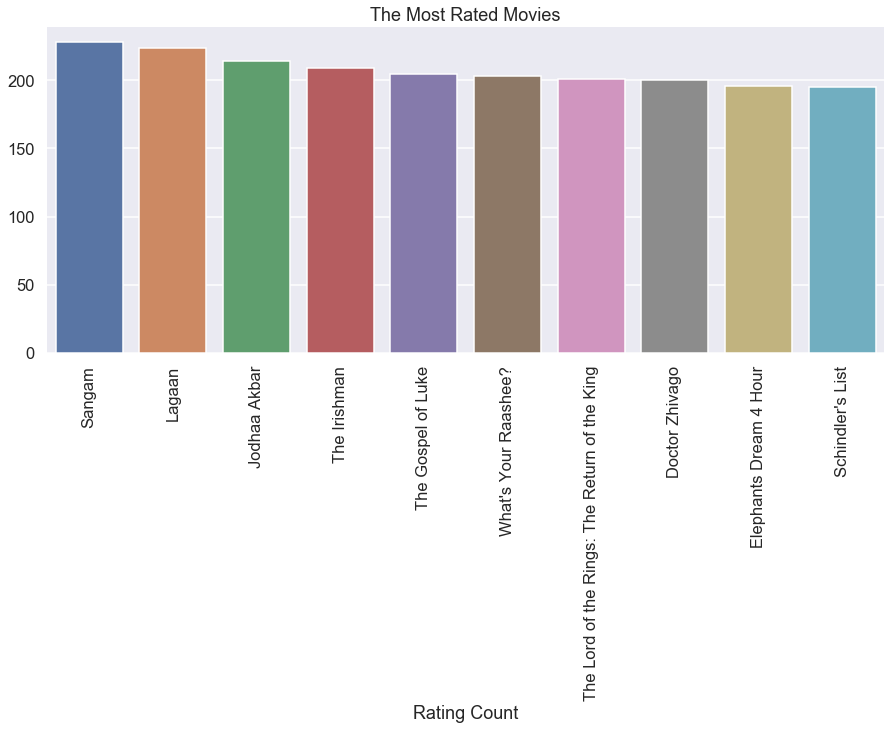

In [135]:
f, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=durations[0:10],y='duration',x='title')
# Add a legend and informative axis label
ax.set(ylabel="",
       xlabel="Rating Count")
ax.title.set_text('The Most Rated Movies')
plt.xticks(rotation=90)
sns.despine(left=True, bottom=True)

In [19]:
display(movies[movies['duration'] == 195])
display(movies[movies['duration'] == 196])
display(movies[movies['duration'] == 200])
display(movies[movies['duration'] == 201])
display(movies[movies['duration'] == 203])
display(movies[movies['duration'] == 205])
display(movies[movies['duration'] == 209])
display(movies[movies['duration'] == 214])
display(movies[movies['duration'] == 224])
display(movies[movies['duration'] == 228])

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,60036359,Movie,Schindler's List,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993,R,195,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4872,70274390,Movie,Elephants Dream 4 Hour,Bassam Kurdali,"Cas Jansen, Tygo Gernandt",Netherlands,"August 23, 2018",2006,TV-MA,196,"International Movies, Sci-Fi & Fantasy","Friends Proog and Emo live in a capricious, se..."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1360,449931,Movie,Doctor Zhivago,David Lean,"Omar Sharif, Julie Christie, Geraldine Chaplin...","United States, Italy, United Kingdom, Liechten...","November 1, 2019",1965,PG-13,200,"Classic Movies, Dramas, Romantic Movies",A young physician and his beautiful mistress g...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
3580,60004484,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5003,70123118,Movie,What's Your Raashee?,Ashutosh Gowariker,"Priyanka Chopra, Harman Baweja, Suzy Brack, Ge...",India,"August 15, 2018",2009,TV-PG,203,"Comedies, International Movies, Music & Musicals","To protect his family from ruin, Yogesh must m..."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
635,81035749,Movie,The Gospel of Luke,David Batty,"Selva Rasalingam, Karima Gouit, Mourad Zaoui, ...","United States, United Kingdom, Morocco","October 19, 2018",2015,TV-14,205,"Dramas, Faith & Spirituality",Word-for-word Bible texts of the entire book o...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1100,80175798,Movie,The Irishman,Martin Scorsese,"Robert De Niro, Al Pacino, Joe Pesci, Harvey K...",United States,"November 27, 2019",2019,R,209,Dramas,Hit man Frank Sheeran looks back at the secret...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
870,70090035,Movie,Jodhaa Akbar,Ashutosh Gowariker,"Hrithik Roshan, Aishwarya Rai Bachchan, Sonu S...",India,"October 1, 2018",2008,TV-14,214,"Action & Adventure, Dramas, International Movies","In 16th-century India, what begins as a strate..."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4106,60020906,Movie,Lagaan,Ashutosh Gowariker,"Aamir Khan, Gracy Singh, Rachel Shelley, Paul ...",India,"December 8, 2017",2001,PG,224,"Dramas, International Movies, Music & Musicals","In 1890s India, an arrogant British commander ..."


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4227,60002818,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,TV-14,228,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...


## What's The Most Common Rating?
Let us now look at how the movie ratings are distributed.

In [137]:
# group by rating
ratings = pd.DataFrame(movies.groupby('rating')['title'].count())
ratings = ratings.rename(columns = {'title':'number_of_movies'})
ratings.reset_index(drop=False, inplace=True)

In [151]:
ratings.sort_values(by='number_of_movies', ascending=False)

,rating,number_of_movies
8,TV-MA,1348
6,TV-14,1038
5,R,506
9,TV-PG,432
4,PG-13,286
2,NR,202
3,PG,183
7,TV-G,80
11,TV-Y7,69
10,TV-Y,41


Now let's look at what this distribution looks like.

Rating With The Most Movies Corresponding to it is TV-MA with a count of 1348


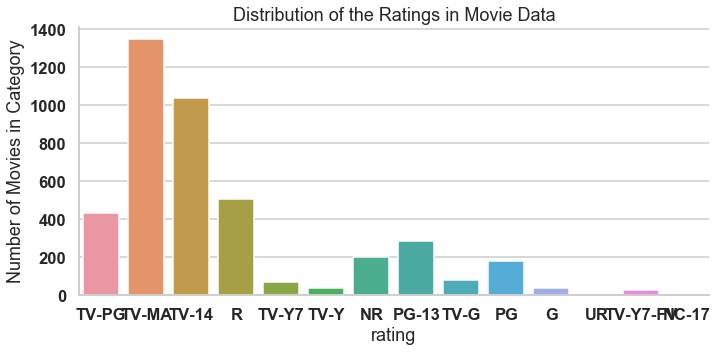

In [152]:
with sns.axes_style('whitegrid'):
    g = sns.catplot("rating", data=movies, aspect=2.0,kind='count')
    g.set_ylabels("Number of Movies in Category")
    plt.title('Distribution of the Ratings in Movie Data')

print("Rating With The Most Movies Corresponding to it " + "is",
        ratings['rating'].mode()[8] + " with a count of",
        ratings['number_of_movies'].max())

From the visual above we see that most of the movies in the dataset are rated TV-
ma, but what does this mean? Programming rated TV-MA in the United States by the TV Parental Guidelines signifies content for mature audiences. Programs with this rating are usually not suitable for minors under 17 years of age (18 in some cases). Content may contain strong coarse language, explicit (in some cases, pornographic) strong sexual content, nudity, or intense/graphic violence.

For a better understanding of what the other ratings mean, please click [here](https://findanyanswer.com/what-does-adult-mean-on-netflix). Let's see in what proportions the ratings are distributed

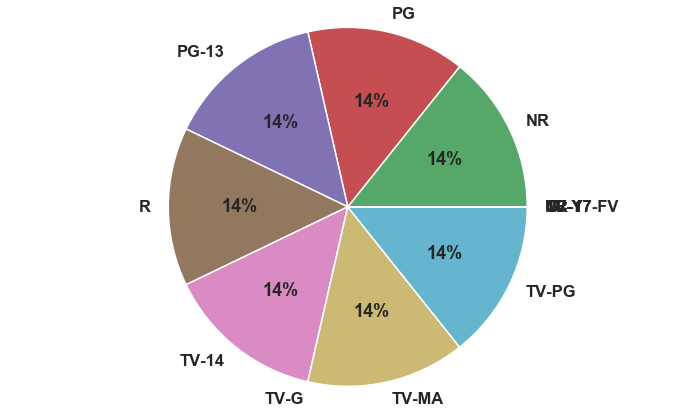

In [153]:
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(10, 6))
ax.pie(ratings['number_of_movies']>100, labels=ratings['rating'],
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
plt.tight_layout()
plt.show()

## In Which Year Were The Most Movies Added To Netflix?

Before we can do our analysis, we have to get our data in the correct format. In this sectoin there are two questions we want to answer:
  - 1. In which year were the most movies released?
  - 2. In which year were the most movies added to Netflix?
  
But the core question that we want to answer here is the second.

#### In which year were the most movies released?

In [171]:
# change the 'release_year' column to datetime
pd.to_datetime(movies['release_year'], format='%Y')

0      2019-01-01
1      2016-01-01
4      2017-01-01
6      2014-01-01
7      2017-01-01
          ...    
5577   2007-01-01
5578   2015-01-01
5579   2014-01-01
5580   2015-01-01
6231   2016-01-01
Name: release_year, Length: 4265, dtype: datetime64[ns]

Next, we create a dataframe that returns the number of movies that were released in each year.

In [172]:
year_df = pd.DataFrame(movies.groupby('release_year')['title'].count()).reset_index()
year_df.rename(columns={'title': 'num_of_titles'}, inplace=True)
year_df.sort_values(by='release_year', ascending=False)
year_df.head()

,release_year,num_of_titles
0,1942,2
1,1943,3
2,1944,3
3,1945,3
4,1946,2


In [173]:
trace1 = go.Scatter(x=year_df.release_year,
                    y=year_df.num_of_titles,
                    name = 'Number of Movies Released per Year, 1942-2020',
                    line = dict(color = 'blue'),
                    opacity = 0.4)

layout = dict(title='Number of Movies Released per Year, 1942-2020',)

fig = dict(data=[trace1], layout=layout)
iplot(fig)

It seems that an the only noticable change in movie releases occcurs in **1960** but it's not really a signifficant inxrease. The biggest change we see is in **1974** where the graph takes on an expobebtial shape and continues to follow the same trend unti it's peak in **2017** where there were **682** movies released. The numbers drop drastically after that. While we would expect **2020** to have more than **6 movie releases**, we can attribute this number to the fact that the dataset is quite outdated and with the international **Covid-19** outbreak earlier this year, most of the world has been on lockdown and this has had an effect on movie production.

#### In which year were the most movies added to Netflix?

In [365]:
def count_drop(x):
    #concatenate all the rows of the genres.
    data_plot = movies[x].str.cat(sep = ',')
    
    def new(data_plot):
        b = []
        data = data_plot.split(',')
        for i in data:
            if len(i)==5 and i[0] != 'M':
                i = i.lstrip()
                b.append(i)
        return b

    plot = pd.Series(new(data_plot))
    #data = pd.Series(plot.split(','))
    #counts each of the genre and return.
    info = plot.value_counts(ascending=False)
    return info

count_drop('date_added')

2019    1546
2018    1290
2017     913
2016     264
2020     147
2015      58
2014      19
2011      13
2013       6
2012       4
2009       2
2008       1
2010       1
dtype: int64

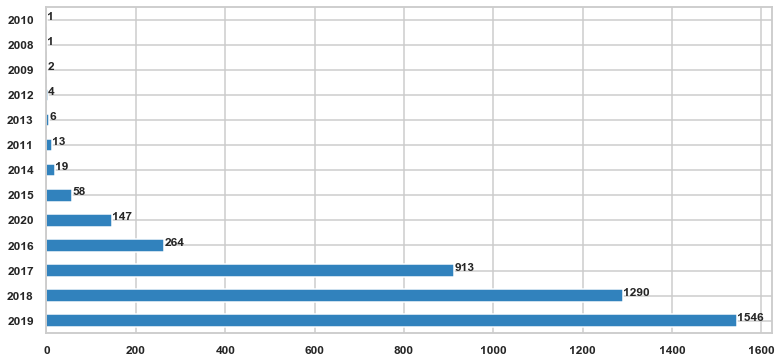

In [394]:
date_added = count_drop('date_added')

date_added.plot(kind= 'barh',figsize = (13,6),fontsize=12,colormap='tab20c')
for index,value in enumerate(date_added):
    plt.text(value, index, str(value))
    plt.rc('font', size=12)

## Whats Is The Number Of Movies In Each Genre? 


In [424]:
#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genres.
    data_plot = movies[x].str.cat(sep = ',')
    data = pd.Series(data_plot.split(','))
    #counts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info[:15]

#call the function for counting the movies of each genre.
a = pd.DataFrame(count_genre('listed_in'))
a

,0
International Movies,1842
Dramas,1077
Comedies,803
Documentaries,644
Action & Adventure,597
Dramas,546
Independent Movies,534
Romantic Movies,374
Children & Family Movies,358
Thrillers,352


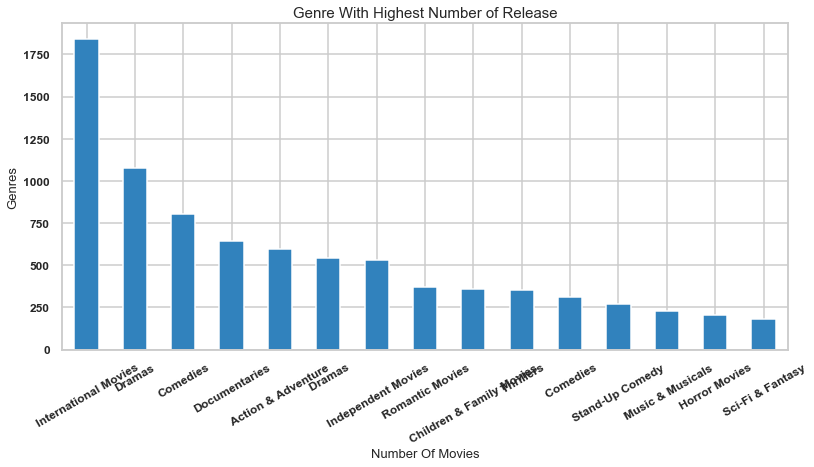

In [425]:
#call the function for counting the movies of each genre.
total_genre_movies = count_genre('listed_in')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'bar',figsize = (13,6),fontsize=12,colormap='tab20c')
plt.xticks(rotation=30)

#setup the title and the labels of the plot.
plt.title("Genre With Highest Number of Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

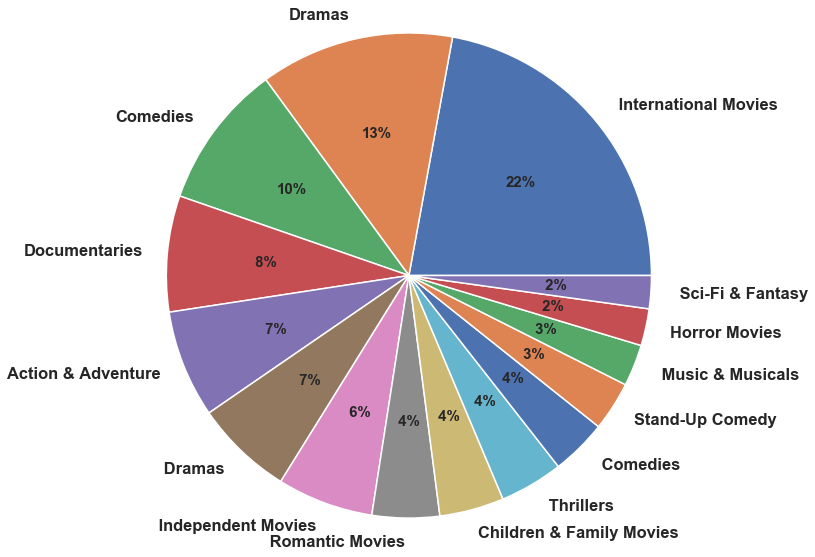

In [426]:
i = 0
genre_count = []
for genre in total_genre_movies.index:
    genre_count.append([genre, total_genre_movies[i]])
    i = i+1
    
plt.rc('font',size=15, weight='bold')
f, ax = plt.subplots(figsize=(10, 8))
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
       autopct = lambda x:'{:2.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)


ax.axis('equal')
plt.tight_layout()


## Which Actors Have The Most Movie Credits?
Let us see which actors appear the most in our dataset. We will use the same function as above.

In [427]:
movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [428]:
def count_actor(x):
    #concatenate all the rows of the genres.
    data_plot = movies[x].str.cat(sep = ',')
    df = pd.Series(data_plot.split(','))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

count_actor('cast')

 Anupam Kher             29
 Om Puri                 25
Shah Rukh Khan           24
 Boman Irani             23
 Paresh Rawal            22
                         ..
 Chuck Russell            1
 Vica Kerekes             1
 Kartikeya Gummakonda     1
 John Robinson            1
 Misty Alli               1
Length: 20165, dtype: int64

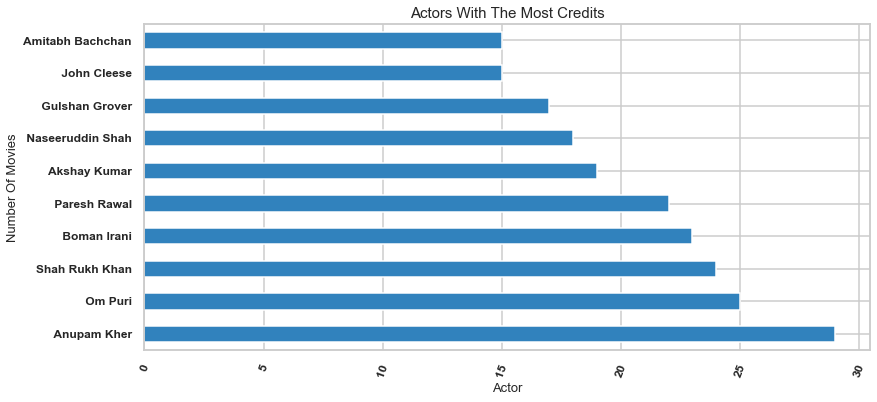

In [433]:
#call the 'count_genre' function which we made earlier for spiliing and counting genres.
#it wiil count number of movies done by each actor.
count_actor_films = count_actor('cast')

#plot the barh plot.
count_actor_films.iloc[:10].plot.barh(figsize=(13,6),colormap= 'tab20c',fontsize=12)

#setup the title and the labels of the plot.
plt.title("Actors With The Most Credits",fontsize=15)
plt.xticks(rotation = 70)
plt.xlabel('Actor',fontsize=13)
plt.ylabel("Number Of Movies",fontsize= 13)
sns.set_style("whitegrid")

## Director With The Most Movie Credits

In [435]:
count_director_movies =  pd.DataFrame(movies.groupby('director')['show_id'].count()).reset_index()
count_director_movies.rename(columns={'show_id':'title_count'}, inplace=True)
count_director_movies = count_director_movies.sort_values(by='title_count', ascending=False)

In [436]:
count_director_movies

,director,title_count
2421,"Raúl Campos, Jan Suter",18
1835,Marcus Raboy,14
1248,Jay Karas,13
1246,Jay Chapman,12
1891,Martin Scorsese,9
...,...,...
1394,John Michael McDonagh,1
1395,"John Mikulak, Joshua Brown",1
1396,John Milius,1
1397,John Murlowski,1


Above we have a dataframe showing directors and the number of movies each of them directed. We will ignore the first entry as it does not give any valuable or interpretable informations. Below we will visualise this information.

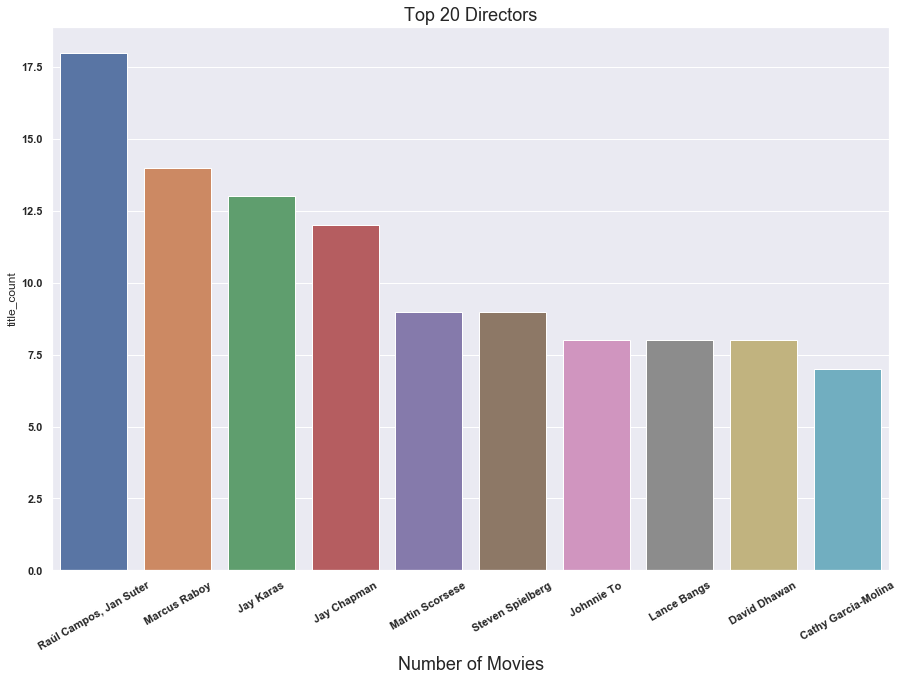

In [442]:
#df3 = list(map(str,(count_director_movies['director'])))
#x = list(df3[1:21])
#y = list(count_director_movies['title_count'][:10])

#make a plot usinf pointplot for top 10 profitable movies.
ax = sns.barplot(x=count_director_movies['director'][:10],
                 y=count_director_movies['title_count'][:10])

plt.xticks(rotation=30)

#setup the figure size
sns.set(rc={'figure.figsize':(15,10)})
#setup the title and labels of the plot.
ax.set_title("Top 20 Directors",fontsize = 18)
ax.set_xlabel("Number of Movies",fontsize = 18)
sns.set_style("darkgrid")

## Most Common Plot Keyword

Let's look at the plot keywords that appear the most in our dataset.

In [449]:
#imdb['plot_keywords'] = imdb['plot_keywords'].fillna(imdb['plot_keywords'].mode(), inplace=True)
def count_words(x):
    #concatenate all the rows of the genres.
    data_plot = movies[x].str.cat(sep = ',')
    df = pd.Series(data_plot.split(','))
    #conts each of the genre and return.
    info = df.value_counts(ascending=False)
    return info

keywords = count_words('listed_in')

i = 0
keyword_occurences = []
for p in keywords.index:
    keyword_occurences.append([p, keywords[i]])
    i = i+1

In [450]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)


(-0.5, 999.5, 299.5, -0.5)

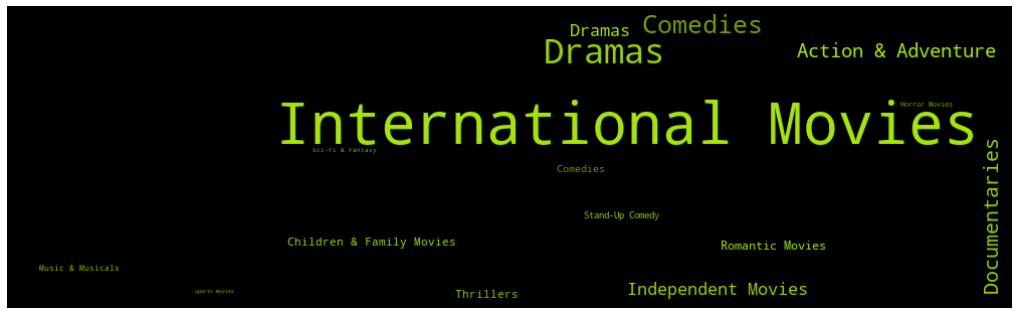

In [451]:
from wordcloud import WordCloud, STOPWORDS
#_____________________________________________
# UPPER PANEL: WORDCLOUD
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
#_______________________________________________________
# I define the dictionary used to produce the wordcloud
words = dict()
trunc_occurences = keyword_occurences[0:100]
for s in trunc_occurences:
    words[s[0]] = s[1]
tone = 55.0 # define the color of the words
#________________________________________________________
wordcloud = WordCloud(width=1000,height=300, background_color='black', 
                      max_words=1628,relative_scaling=1,
                      color_func = random_color_func,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')

# References

'Exploratory Data Analysis of Netflix Data', Sadrach Pierre, Ph.D.
Mar 23, 2020
https://towardsdatascience.com/exploring-netflix-data-in-python-eb03e8f3944c

EDSA Movie Recommender Challenge, Team_8_CPT:TheDreamTeam, 'Analyze This'(Kaggle Notebook), 2020

'Netflix Movies and TV shows:Movies and TV Shows listings on Netflix', Shivam Bansal [here](https://www.kaggle.com/shivamb/netflix-shows)